<a href="https://colab.research.google.com/github/adilsong3/DataScience_Junior/blob/master/Analisando_os_Dados_do_Airbnb_Columbus_Ohio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - **Columbus, Ohio** nos *Estados Unidos*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade *Columbus, Ohio*, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Iremos trabalhar com os dados disponibilizados pelo [Airbnb](https:/insideairbnb.com/get-the-data.html/). 

* Utilizaremos apenas os dados da base [listings.csv](https:/data.insideairbnb.com/united-states/oh/columbus/2020-04-25/visualisations/listings.csv/) os dados são do dia 29 de abril de 2020.

A cidade escolhida para a analise é **Columbus**, **Ohio** que fica localizada nos **Estados Unidos**. A mesma possui atualmente uma população de aproximadamente *900 mil habitantes*.

![Foto do google](https://www.zippia.com/research/test/city_skylines/Columbus-ohio-skyline.jpg)</center>

In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/oh/columbus/2020-04-25/visualisations/listings.csv")

## Análise dos Dados

Essa etapa tem como objetivo se relacionar com os dados, se você não sabe o tipo de dados que está lidando esse é o momento para fazer a exploração inicial e conhecer os dados brutos.

* Primeiro vamos identificar cada coluna e colocar seu significado ao lado para uma melhor interpretação dos dados no futuro, seja para você ou para um terceiro se achar na sua analise.

**Dicionário das variáveis**

* **Id** - número de id gerado para identificar o imóvel
* **Name** - nome da propriedade anunciada
* **Host_id** - número de id do proprietário (anfitrião) da propriedade
* **Host_name** - Nome do anfitrião
* **Neighbourhood_group** - esta coluna não contém nenhum valor válido
* **Neighbourhood** - nome do bairro
* **Latitude** - coordenada da latitude da propriedade
* **Longitude** - coordenada da longitude da propriedade
* **Room_type** - informa o tipo de quarto que é oferecido
* **Price** - preço para alugar o imóvel
* **Minimum_nights** - quantidade mínima de noites para reservar
* **Number_of_reviews** - número de reviews que a propriedade possui
* **Last_review** - data do último review
* **Reviews_per_month** - quantidade de reviews por mês
* **Calculated_host_listings_count** - quantidade de imóveis do mesmo anfitrião
* **Availability_365** - número de dias de disponibilidade dentro de 365 dias


Para conseguir chegar ao seu objetivo na analise exploratória de dados primeiro precisamos definir o que queremos descobrir, quais são nossas dúvidas. Se não pensarmos antes de iniciar a analise apenas será um monte de linhas de código sem uma direção. 
![imagem do pixabay](https://cdn.pixabay.com/photo/2017/04/20/10/11/questions-2245264__340.jpg)
****
Dividindo a análise por perguntas:

1.   **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
2.   **Qual a porcentagem de valores ausentes no *dataset*?**
3.   **Qual o tipo de distribuição das variáveis?**
4.   **Há outliers presentes?**
5.   **Qual a média dos preços de aluguel?**
6.   **Qual a corretação existente entre as variaveis.**
7.   **Qual o tipo de imóvel mais alugado no Airbnb nessa cidade?**
8.   **Qual a localidade mais cara do dataset?**
9.   **Qual é a média do mínimo de noites para alugual?**

Finalizaremos com umas breves conclusões.


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

* Aqui o objetivo é descobrir o tamanho do nosso dataframe, procurar saber quantos entradas (linhas) e quantas variaveis (colunas) nosso DF (dataframe) possui.
* Logo de inicio vemos 1620 entradas (linhas) e 16 variaveis (colunas).

In [31]:
# identificar o volume de dados do DataFrame
print(f'Entradas: {df.shape[0]}')
print(f'Variaveis: {df.shape[1]}\n')

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas: 1620
Variaveis: 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

O objetivo com a analise a seguir é verificar quais valores estão ausentes e com isso verificar a possibilidade de trata-los ou retiralos da nossa analise.

* Verificamos acima que o campo **neighbourdhood_group** possui dados 100% dos dados não preenchidos ou NaN (nullos ou em branco), com isso podemos pensar em retira-lo de nosso DF sem prejudicar os dados e analises futuras.
* As variáveis **reviews_per_month** e **last_review** possuem valores nulos com 10% das linhas.

In [32]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.112346
last_review                       0.112346
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

O objetivo abaixo é plotar gráficos de histogramas, para analisarmos como está a distribuição dos dados. Saiba mais sobre esse tipo de gráfico no [matplotlib.org](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html).

* Concluimos com a analise dos histrogramas acima que algumas variaveis como: **price, minimum_nights e calculated_host_listings_count** não possuem uma distribuição aceitavel, serão outliers?

Os valores apresentados não seguem nenhuma distruição que podemos tirar algum insite.

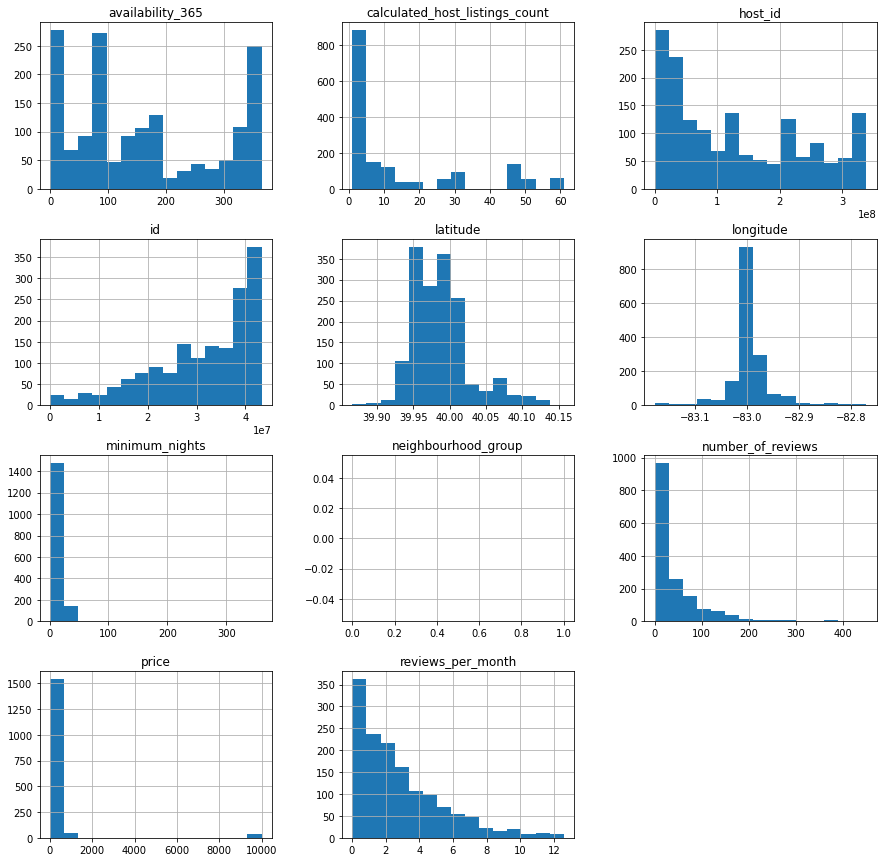

In [33]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15, 15))

plt.show()

### **Q4. Há outliers presentes?**

Após a analise acima vemos que alguns gráficos como **price**, **minimum_nights** e ** calculate_host_listings_count** estão com uma distribuição fora da normalidade, utilizaremos duas formas para verificar os outliers:

* Resumo estátistico utilizando **describe**.
* Plotar gráficos utilizando **boxplot** para variaveis.


In [34]:
# Criando uma lista de variaveis onde iremos analisas separadamente do Data Frame
variaveis = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Analisando apenas as variaveis que escolhemos para fazer o resumo estatistico
df[variaveis].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1620.000000,1620.000000,1620.000000,1438.000000,1620.000000,1620.000000
mean,357.460494,4.473457,42.465432,2.869847,13.450617,161.820988
std,1443.485315,12.902635,60.468028,2.530863,18.093523,125.450950
min,10.000000,1.000000,0.000000,0.030000,1.000000,0.000000
25%,59.000000,1.000000,3.000000,0.860000,1.000000,64.000000
50%,92.500000,1.000000,18.000000,2.200000,3.000000,139.000000
75%,150.000000,2.000000,57.000000,4.157500,19.000000,293.000000
max,10000.000000,360.000000,449.000000,12.590000,61.000000,365.000000


Após fazer um describe das variaveis selecionadas, verificamos em numero que possuem varios outliers.
* Será que realmente um dono de um imovel aluga por no minimo 360 noites? **veja o max do minimum_nights**
* Será que alguma pessoa paga 10000 por noite? **veja o max do price**


### Boxplot minumum_nights

* Verificamos ao plotar o gráfico que existem poucos outliers cerca de 24 com um percentual de aproximadamente 1,5%.

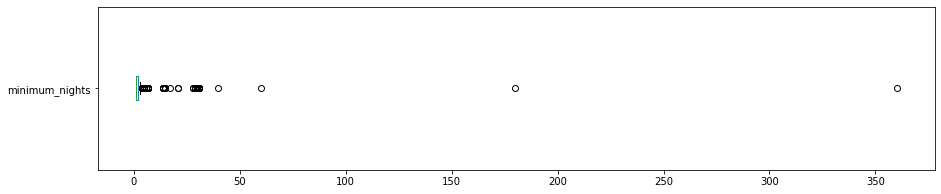

minimum_nights: valores acima de 30 dias
Entradas: 24
1.4815%


In [69]:
# minimum_nights
df.minimum_nights.plot(kind="box", vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30 dias")
print(f"Entradas: {len(df[df.minimum_nights > 30])}")
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

### Boxplot price

* Após analisar vemos que temos 82 valores fora do valor padrão de aluguel, que percetualmente da aproximadamente 5,1%

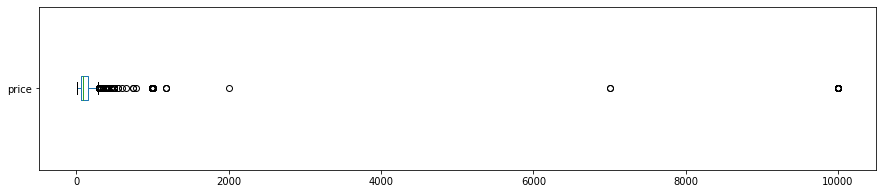

price: valores acima de 500
Entradas: 82
5.0617%


In [71]:
# minimum_nights
df.price.plot(kind="box", vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("price: valores acima de 500")
print(f"Entradas: {len(df[df.price > 700])}")
print("{:.4f}%".format((len(df[df.price > 700]) / df.shape[0])*100))

### Histrograma sem outliers

* Chegamos a um ponto onde iremos limpar os dados extremos para ter uma analise mais acertiva.
* Logo após a limpeza vemos a distruição que anteriormente parecia não existir bem visivel.
* Foi feito uma cópia do dataframe para evitar problemas futuros, nessa cópia foi retirada a coluna "neighbourhood" e também os outliers antes descobertos.

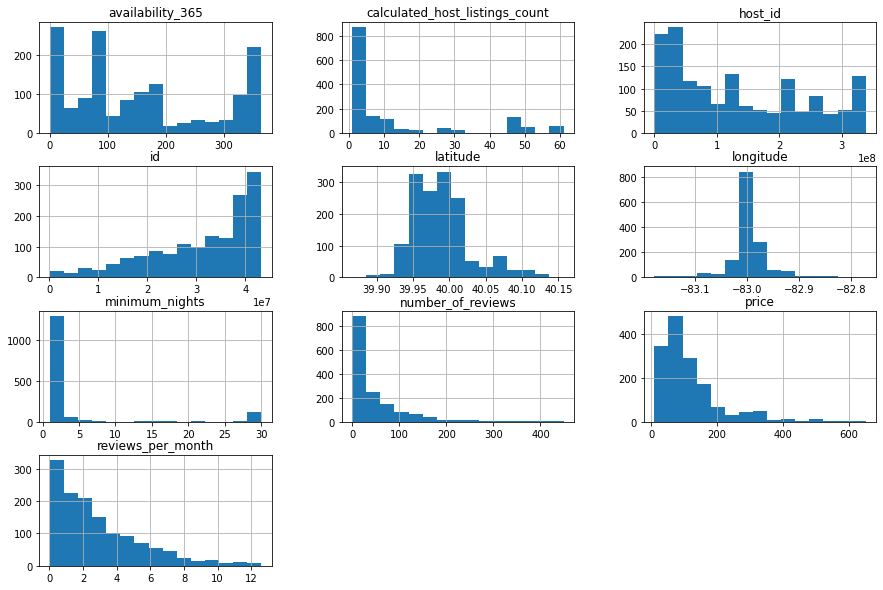

In [41]:
# Criando uma copia do dataframe e removendo os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 700].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# Plotar histograma após a limpeza dos outliers
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a média dos preços de aluguel?**


*   Identificamos que após a limpeza dos dados a média dos alugueis diarias cairam é relação ao data frama inteiro.

In [45]:
# ver a média da coluna `price``
df_clean.price.mean()

116.80581241743725

### **Q6. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

* O objetivo agora é com o seaborn plotar um gráfico mostrando a correlação do nosso dataframe.


In [42]:
# Criando uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.149053,-0.015365,0.162424,0.102951,-0.001174
minimum_nights,-0.149053,1.000000,-0.110696,-0.200350,0.022137,0.138800
number_of_reviews,-0.015365,-0.110696,1.000000,0.633213,-0.140357,0.092838
reviews_per_month,0.162424,-0.200350,0.633213,1.000000,0.113834,0.015621
calculated_host_listings_count,0.102951,0.022137,-0.140357,0.113834,1.000000,0.042583
availability_365,-0.001174,0.138800,0.092838,0.015621,0.042583,1.000000


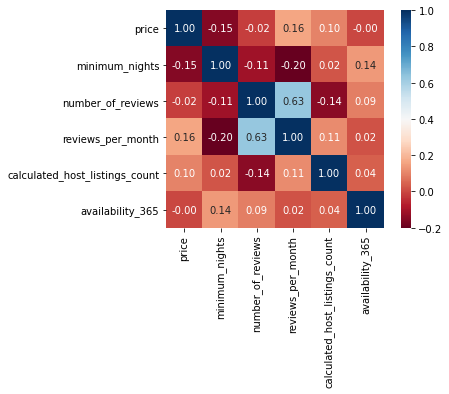

In [43]:
# Plotando um gráfico de correção com seaborn

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb nessa cidade?**

A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

* Após apresentar os dados ficou nítido que as casas e apartamentos são os preferidos com base nos dados desse dataset.

In [48]:
# mostrar a quantidade de cada tipo de imóvel disponível
# utilizaremos o value_counts para fazer essa contagem unica
df_clean.room_type.value_counts()

Entire home/apt    1106
Private room        384
Shared room          21
Hotel room            3
Name: room_type, dtype: int64

In [49]:
# mostrar a porcentagem de cada tipo de imóvel disponível
# faremos a mesma contagem anterios, porém faremos uma divisão simples pelo numero de linhas.
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.730515
Private room       0.253633
Shared room        0.013871
Hotel room         0.001982
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara do dataset?**

Agora iremos verificar quais são os bairros mas caros, o campo **neighbourhood** indica nome do bairro.

* Irei utilizar o **groupby** para agrupar o data frame a apenas uma coluna, tiramos a média pela coluna **price** com a função mean() e depois será colocado em ordem decrescente utilizando o sort_values()

In [53]:
# ver preços por bairros, na média e mostrando até o 10º lugar
df_clean.groupby("neighbourhood").price.mean().sort_values(ascending=False)[:10]

neighbourhood
Rickenbacker             275.000000
Downtown                 144.989011
Near South               134.552632
Near North/University    126.249600
Hayden Run               124.583333
West Olentangy           121.140000
Rocky Fork-Blacklick     117.608696
Far South                113.400000
Near East                107.023810
Westland                 106.800000
Name: price, dtype: float64

Após fazer o calculo médio, devemos sempre nos questionar os dados realmente está corretos, o bairro Rickenbacker é o mais caro?

* Vamos olhar apenas esse bairro para ver se faz sentido ele ser o mais caro.
* Após abrir esse bairro vemos que o mesmo tem apenas 1 dado em todo o dataset. Devemos tomar alguns cuidados quando queremos expor os dados.



In [64]:
print(df_clean[df_clean.neighbourhood == "Rickenbacker"].shape)


(1, 15)


* Como esse dataframe disponibiliza a latitude e longitude de cada imovel é possivel plotar gráfico tipo scatter ou mapa.

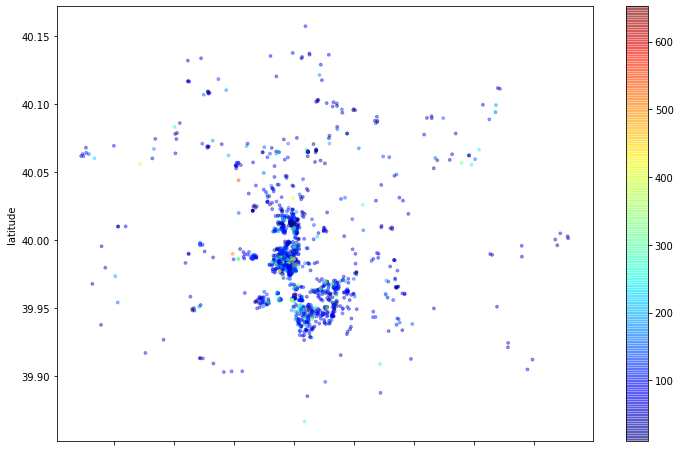

In [65]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

* A média de minimo de noites que as pessoas geralmente alugam, fica em torno de 3 a 4 noites.

In [68]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

3.8758256274768823

## Conclusões


Foi feito algumas analises superficial nesse dataset do [Airbnb](http://insideairbnb.com/get-the-data.html), após essa analíse chegamos a algumas conclusões:

1.   Esse dataset estava com alguns outliers mesmo sendo a versão resumida.
2.   Utilizamos um dataset resumido com apenas 16 atributos, para ter uma analise mais aprofudada recomenda-se utilizar o completo com mais de 100 atributos.
3.   Não podemos tirar concluões com base só nos dados, precisam verificar a fundo pois como os dados são resumidos podemos facilmente nos enganar e passar informações incompletas.
4. Por fim, quando trabalhamos com uma pequena quantidade de dados alguns outliers pode arrebentar com a nossa analise, por isso avalie sempre que pergunta deseja responder ou que problema deseja solucionar, cada caso é diferente e terá momento que o seu foco será justamente apenas trabalhar com os outliers.



